# NMF


In [1]:
import pickle

from TTMonitor.preprocess import *

from TTMonitor.DocPooler import DocPooler
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer

## Setup

In [2]:
COUNTRY = "uk"
NAME ="covid"

DATA_PATH = "data/uk_rawdata_20201226.pkl" # "uk_raw.pkl"

preprocess_params = {"include_hashtags": False}

include_keywords = ['covid', 'coronavirus', 'virus', 'covidiot', 'trumpvirus', 'test', 'safe',
 'coronaswimwewr', 'pandemic', 'mask', 'viruscoronavirus', 'wearamask', 'quarantine',
 'stayhome', 'sick', 'coronaviru', 'coviddays', 'CDC', 'Wuhancoronavirus', 'Wuhanlockdown',
 'Ncov', 'Wuhan', 'N95', 'Kungflu', 'Epidemic', 'outbreak', 'Sinophobia', 'China', 'covid-19',
 'covid19', 'sars-cov-2', 'COVIDー19', 'COVD', 'pandemic', 'coronapocalypse', 'Coronials', 'canceleverything',
 'SocialDistancingNow', 'Social', 'panicbuy', 'panic', '14DayQuarantine', 'DuringMy14DayQuarantine', 'InMyQuarantineSurvivalKit',
 'panic-buy', 'panic-shop', 'coronakindness', 'quarantinelife', 'chinesevirus7', 'chinese', 'stayhomechallenge',
 'sflockdown', 'DontBeASpreader', 'lockdown', 'lock', 'shelteringinplace', 'sheltering', 'staysafestayhome',
 'trumppandemic', 'flattenthecurve', 'flatten', 'china', 'chinavirus', 'quarentinelife',
 'PPEshortage', 'saferathome', 'stayathome', 'stayhome', 'GetMePPE', 'covidiot', 'epitwitter',
 'pandemie', 'wear', 'wearamask', 'kung', 'covididiot', 'COVID__19']
include_keywords = [word.lower() for word in include_keywords]
exclude_keywords = []

from nltk.corpus import stopwords
stopwords.words("english")
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
stop_words = ENGLISH_STOP_WORDS

tfidf_params = {"stop_words":stop_words, "max_df":0.8, "min_df":5,"ngram_range":(1,2),"max_features":20000}

nmf_params = {"n_components":25, "random_state":3, "shuffle":True,"max_iter":400,"alpha":0.1}

/home/matze/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_extraction.stop_words module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_extraction.text. Anything that cannot be imported from sklearn.feature_extraction.text is now part of the private API.
  warnings.warn(message, FutureWarning)


## Preprocess

In [3]:

data = pickle.load( open( DATA_PATH, "rb" ) )


#json_data = [parse_tweet(data) for data in json_data]
data = parse_tweets(data, **preprocess_params)

data = filter_tweets(data, include_keywords)
data = filter_tweets(data, exclude_keywords, include=False)

# NMF

In [4]:
doc_pooler = DocPooler(data, doc_threshold=5)

In [5]:

tfidf = TfidfVectorizer(**tfidf_params)
tkn = tfidf.fit_transform(doc_pooler.tweet_df.full_text)
nmf = NMF(**nmf_params)
W = nmf.fit_transform(tkn)
H = nmf.components_

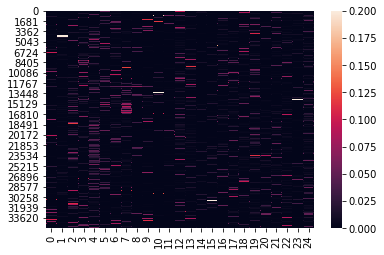

In [6]:
import seaborn as sns
sns.heatmap(W, vmax=0.2)

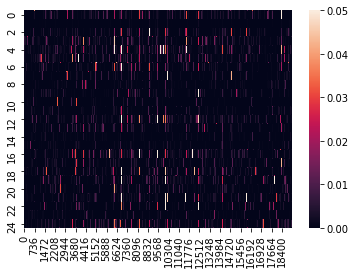

In [7]:
sns.heatmap(H,vmax=0.05)

In [8]:
import numpy as np
feature_names = np.array(tfidf.get_feature_names())
for i in range(H.shape[0]):
    print(i,feature_names[np.flip(np.argsort(H[i]))[0:15]])

0 ['media' 'social media' 'social' 'follow' 'share' 'post' 'platforms'
 'twitter' 'marketing' 'like' 'posts' 'facebook' 'news' 'channels'
 'business']
1 ['mom worked' 'lost business' 'treat family' 'money treat' 'like use'
 'business like' 'family special' 'covid lost' 'special christmas'
 'hard year' 'use money' 'worked hard' 'mom' 'year covid' 'treat']
2 ['stay' 'safe' 'stay safe' 'happy' 'halloween' 'hope' 'safe stay' 'enjoy'
 'weekend' 'safe amp' 'happy halloween' 'soon' 'remember' 'thank' 'night']
3 ['19' 'covid 19' 'covid' 'restrictions' '19 pandemic' '19 vaccine'
 '19 restrictions' 'positive' 'positive covid' 'gt' 'government' 'tier'
 'deaths' 'impact' '2020']
4 ['lockdown' 'week' 'open' 'going' 'national' 'national lockdown' 'tier'
 'second' 'england' '2nd' 'second lockdown' 'weeks' 'night' 'november'
 'december']
5 ['amp' 'safe amp' 'amp safe' 'support' 'amp social' 'safe' 'lockdown amp'
 'open' 'amp amp' 'available' 'covid amp' 'staff' 'amp covid' 'health'
 'amp stay']
6 ['we

In [9]:
pred_tokens = tfidf.transform(data.tweet_df.full_text)
sns.heatmap(nmf.transform(pred_tokens))

AttributeError: 'list' object has no attribute 'tweet_df'

# Datetime handler

In [ ]:
#from datetime import datetime
#"%a %b %-d %H:%M:%S %z %Y"
#datetime.strptime(json_data[99]["created_at"],"%a %b %d %H:%M:%S %z %Y")
#[datetime.strptime(data["created_at"],"%a %b %d %H:%M:%S %z %Y") for data in json_data]
